#### Author: Mohamad Ebrahimi

Importing necessay librarries

In [29]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
data_types_list = [np.float64, np.int64, np.float64, np.float64, np.float64, np.float64, np.int64, np.int64, str]
data_types_dict = dict(zip(column_names, data_types_list))
data = pd.read_fwf('auto-mpg.data', delimeter=" ", names=column_names, dtypes=data_types_dict, na_values='?')


Plotting all columns, works, but does not provide a lot of insight.

<AxesSubplot:>

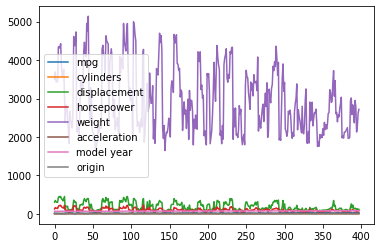

In [4]:
data.plot()

Let's look at the mpg distribution (a histogram)

<AxesSubplot:ylabel='Frequency'>

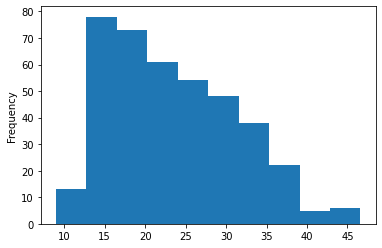

In [17]:
data['mpg'].plot.hist()

how many origins we have?

In [102]:
data.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

Notice that we accessed the origin column with dot notation. This can be done whenever the column name is 'nice' enough to be a python variable name.

Do we have similar mpgs in different mpgs?  
Plotting three histograms for each origin side beside directly form the dataframe:

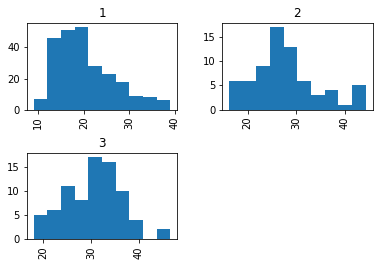

In [103]:
axs = data.hist(column='mpg', by='origin')

To format this plot, we can work on the axes (array) that is returned by the plot call. We use Matplotlib object oriented interface methods to do this

[Text(0.5, 1.0, 'origin=3'), (0.0, 20.0)]

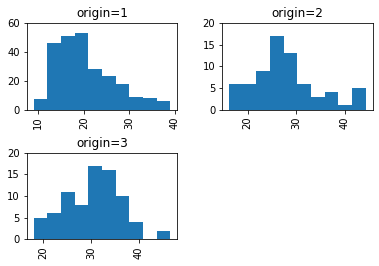

In [104]:
axs = data.hist(column='mpg', by='origin')
axs[0][0].set(title='origin=1', ylim=[0, 60])
axs[0][1].set(title='origin=2', ylim=[0, 20])
axs[1][0].set(title='origin=3', ylim=[0, 20])


Is mpg and weight correlated? Maybe it is different for different dispalcements?  
Let's have a look with a scatter plot.

<AxesSubplot:xlabel='mpg', ylabel='weight'>

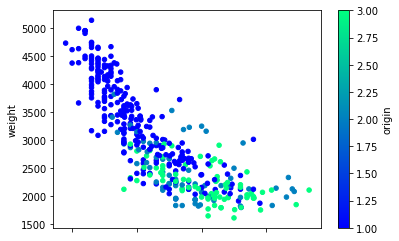

In [105]:
data.plot.scatter('mpg', 'weight', c='origin', colormap='winter')

According to:  
https://stackoverflow.com/questions/43578976/pandas-missing-x-tick-labels

the missing x-labels are a pandas bug.

Workaraound is to create axes prior to calling plot

<AxesSubplot:xlabel='mpg', ylabel='weight'>

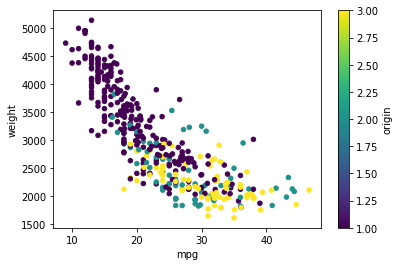

In [106]:
fig, ax = plt.subplots()
data.plot.scatter('mpg', 'weight', c='origin', colormap='viridis', ax=ax)

It is a bit annoying that there is a colorbar, we know origin is categorical.

One way to avoid the colorbar is to loop over the categories and assign colors based on the category.

See:
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib

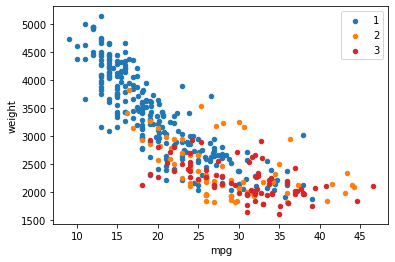

In [109]:
colors = {1: 'tab:blue', 2: 'tab:orange', 3: 'tab:red'}
fig, ax = plt.subplots()
for key, group in data.groupby(by='origin'):
    group.plot.scatter('mpg', 'weight', c=colors[key], label=key, ax=ax)

## Seaborn 
>Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

http://seaborn.pydata.org/index.html

Seaborn is usually imported as `sns`

In [110]:
import seaborn as sns

Let's re-create the histograms by origin with seaborn with the figure level `displot()` function.

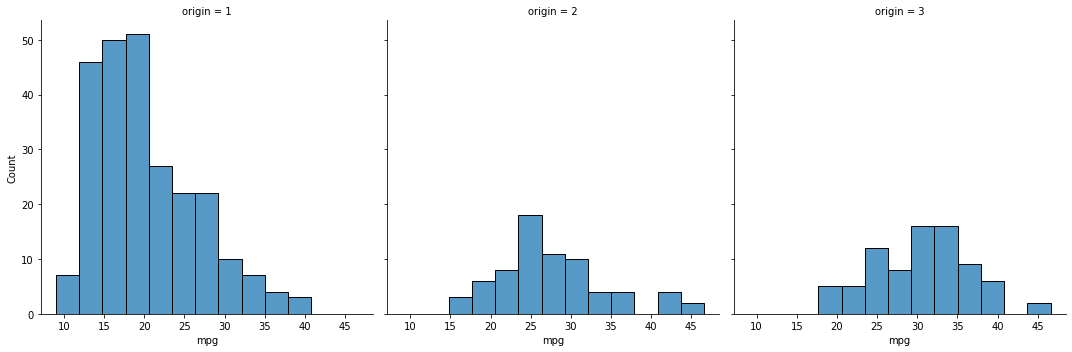

In [111]:
# Use origin to split mpg into columns
sns.displot(x='mpg', col='origin', data=data)

We can display the counts in the same plot, one on top of the other.

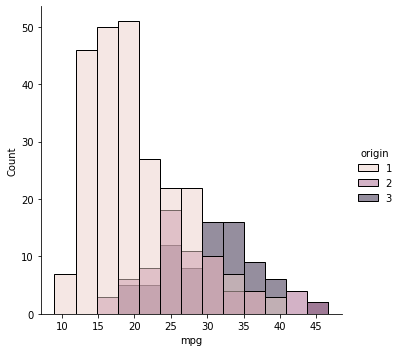

In [112]:
# Use origin to color (hue) in the same plot
sns.displot(x='mpg', hue='origin', data=data)

To have an idea of the split between male and female, we can stack the counts, adding up to total.

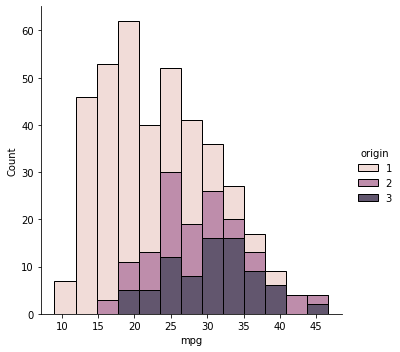

In [113]:
sns.displot(x='mpg', hue='origin', data=data, multiple='stack')

We can look at the differences in mpgs with a boxplot too

<AxesSubplot:xlabel='origin', ylabel='mpg'>

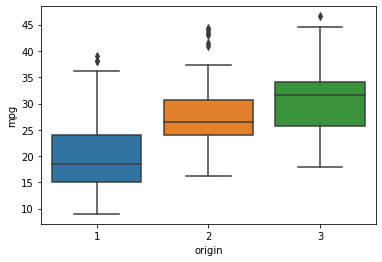

In [114]:
sns.boxplot(x='origin', y='mpg', data=data)

Let's re-create the scatter plot to see if mpg and weight are correlated by origin.

To make the legend show strings we will create a origin string column with female and male strings rather than 0 and 1.

In [123]:
data['origin_str'] = data['origin'].replace([1,2,3], ['origin=1', 'origin=2', 'origin=3'])

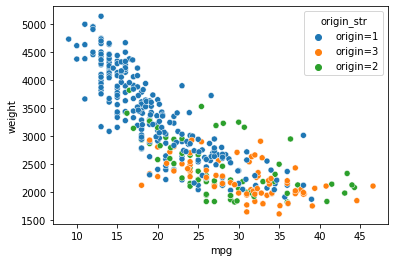

In [124]:
ax = sns.scatterplot(x='mpg', y='weight', data=data, hue='origin_str')

Adding a regression line helps with visualizing the relationship

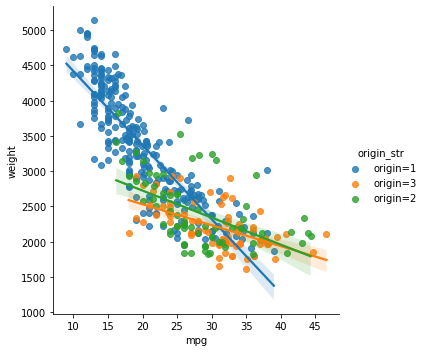

In [125]:
ax = sns.lmplot(x='mpg', y='weight', data=data, hue='origin_str')

Maybe there are other correlations in the data set. Pairplot is a great way to get an overview

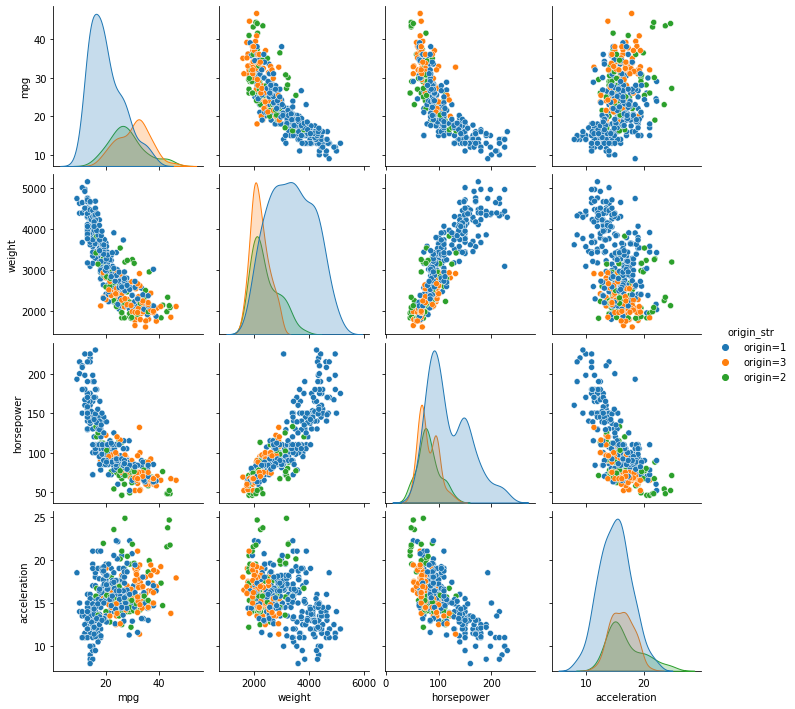

In [126]:
sns.pairplot(data, vars=['mpg', 'weight', 'horsepower', 'acceleration'], hue='origin_str')

As an alternative, we can visualize the correlation matrix as a heatmap

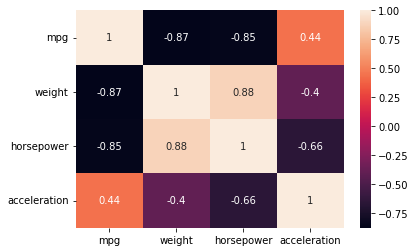

In [127]:
g = sns.heatmap(data[['mpg', 'weight', 'horsepower', 'acceleration']].corr(method='spearman'), 
            annot=True)

There are nice tutorials on the Seaborn website, be sure to check these out.